![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [142]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [143]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [144]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [145]:
bikes.groupby('season').total.mean().tolist()

[116.34326135517499, 215.25137211855105, 234.417124039517, 198.98829553767374]

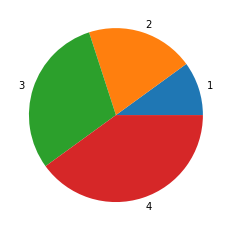

In [146]:
import matplotlib.pyplot as plt

seasons = [1,2,3,4]
totalmenas = bikes.groupby('season').total.mean().tolist()
plt.pie(seasons, labels=seasons)
plt.show()

In [147]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [148]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


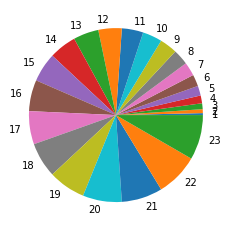

In [149]:
hours = list(range(1, 24))
totalhoras = bikes.groupby('hour').total.mean().tolist()
plt.pie(hours, labels=hours)
plt.show()

El conjunto de datos describe sistemas de bicicletas compartidas que permiten al usuario alquilar una bicicleta desde una posición determinada y devolverla en otra. Actualmente, hay más de 500 programas de bicicletas compartidas en todo el mundo, y la duración del viaje, la posición de salida y llegada se registran explícitamente en estos sistemas. Esto convierte el sistema en una red virtual de sensores que puede utilizarse para detectar la movilidad en la ciudad y se espera que pueda detectar la mayoría de los eventos importantes en la ciudad.

A continuación se presentan las variables y su significado:

• instant: índice de registro • dteday: fecha • season: estación (1: invierno, 2: primavera, 3: verano, 4: otoño) • yr: año (0: 2011, 1: 2012) • mnth: mes (1 a 12) • hr: hora (0 a 23) • holiday: día festivo o no (extraído de [Web Link]) • weekday: día de la semana • workingday: si el día no es fin de semana ni festivo es 1, de lo contrario es 0. • weathersit: • 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado • 2: Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla • 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas • 4: Lluvia intensa + Hielo + Tormenta + Niebla, Nieve + Niebla • temp: temperatura normalizada en Celsius. Los valores se derivan mediante (t-t_min) / (t_max-t_min), t_min=-8, t_max=+39 (solo en escala horaria) • atemp: sensación térmica normalizada en Celsius. Los valores se derivan mediante (t-t_min) / (t_max-t_min), t_min=-16, t_max=+50 (solo en escala horaria) • hum: humedad normalizada. Los valores se dividen entre 100 (máximo) • windspeed: velocidad del viento normalizada. Los valores se dividen entre 67 (máximo) • casual: cantidad de usuarios ocasionales • registered: cantidad de usuarios registrados • cnt: cantidad total de bicicletas de alquiler, incluidos los usuarios ocasionales y registrados.

Para el desarrollo del primero punto, se realiza un análisis de la columna “Season” con respecto al total, la variable representa la época del año en el cual se realiza el presentamo de la bicicleta. La variable está factorizada del 1 al 4 siendo la opciones posibles 1: invierno, 2: primavera, 3: verano, 4: otoño.

Se observa que la época del año donde más préstamos de bicicletas se realizan es Verano, con una media de 243 bicicletas en alquiler, luego sigue la primavera con una media de 215, seguido del otoño e invierno con unas medias de 198 y 116 respectivamente.

Luego, a través de la función .describe(), se analiza un poco más a fondo el comportamiento de la variable a través de las estaciones, para cada una de estas se muestra el conteo de datos, la media de bicicletas en alquiler, desviación, mínimo, máximo y cuartiles 2, 3 y 4. Por ejemplo, para la primera estación, invierno, se encuentra un total de 2686 datos, lo cual parece representar datos faltantes con respecto a las otras estaciones. Se observa una media de 116 bicicletas en alquiler, una desviación de 125, in mínimo de 1 bicicleta en alquiler, máximo de 801, con unos percentiles 2, 3 y 4 de 24, 78 y 164 bicicletas en alquiler, respectivamente.

Finalmente, a través de matplotlip, se realiza un gráfico circular que permite visualizar la proporción de bicicletas en alquiler de acuerdo a su estación. Posteriormente, se realiza un análisis similar pero ahora con la variable “hour” que representa la hora del día de la renta de bicicletas. Se presenta una tabla que relaciona la hora del día con el número de bicicletas en alquiler, y se puede apreciar que ejemplo a las 10 am, se relacionan 175 préstamos de bicicletas, mientras que a las 11 pm solo se relacionan 89 préstamos.

Luego, a través de la función .describe(), se analiza un poco más a fondo el comportamiento de la variable total a través de las diferentes horas del día, para cada una de estas se muestra el conteo de datos, la media de bicicletas en alquiler, desviación, mínimo, máximo y cuartiles 2, 3 y 4. Por ejemplo, para la primera hora, se encuentra un total de 454 datos. Se observa una media de 55 bicicletas en alquiler, una desviación de 34, in mínimo de 2 bicicletas en alquiler, máximo de 283, con unos percentiles 2, 3 y 4 de 19, 46 y 168 bicicletas en alquiler, respectivamente.

Finalmente, a través de matplotlip, se realiza un gráfico circular que permite visualizar la proporción de bicicletas en alquiler de acuerdo a hora del día

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

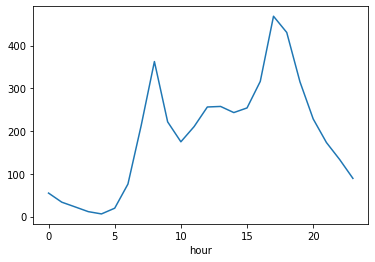

In [150]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

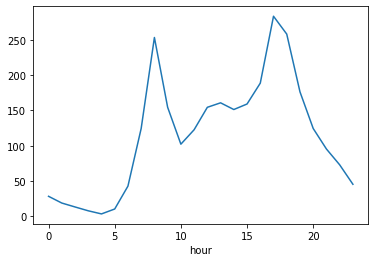

In [151]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.groupby(['season','hour']).total.mean()[1].plot()

<AxesSubplot:xlabel='hour'>

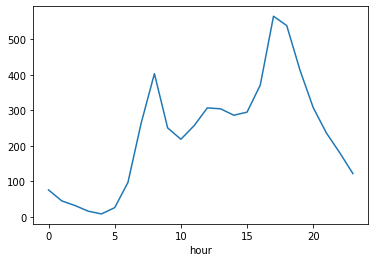

In [152]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.groupby(['season','hour']).total.mean()[3].plot()

En esta segunda parte, se explora un análisis gráfico de diferentes variables. Primero, y a través de un gráfico lineal, se relaciona la hora del día con el total de bicicletas en alquiler, se observa por ejemplo un par de picos alrededor de las 9 am las 6 pm.

Luego, se hace un análisis gráfico utilizando el mismo tipo de gráfica, pero esta vez, se segmentan los datos para relacionar la hora del día y el total de bicicletas en alquiler solamente cuando la estación es invierno, se observa un comportamiento muy similar con picos predominantes en las mismas horas, sin embargo, si analizamos por ejemplo los total de esos picos, vamos a notar que son más bajos que en la gráfica anterior, por ejemplo, alrededor de las 9 am el total de bicicletas en alquiler es de aproximadamente 250, mientras que en la gráfica anterior, este mismo pico representaba aproximadamente 390 bicicletas en alquiler.

Finalmente, se aplica la misma dinámica anterior pero ahora se analiza el comportamiento durante el verano, los comportamientos de la gráfica y sus picos en general son muy similares, pero, incrementan el número total de bicicletas en alquiler. Por ejemplo, en la gráfica anterior, para el invierno, en el pico que se encuentra alrededor de 6 pm, se pueden apreciar en promedio 260 bicicletas en alquiler, mientras que en el verano, esta gráfica nos muestra en promedio 550 bicicletas en alquiler.

Se concluye que si bien los picos parecen ser los mismos entre las estaciones, las cantidades si aumentan o disminuyen según la estación en donde se encuentre.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [153]:
# Celda 3
X = bikes[['hour','season']]
y = bikes['total']

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X, y)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independiente: \n', regr.intercept_)
# Error Cuadrado Medio
print("MSE - Error cuadrado medio: %.2f" % mean_squared_error(y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Puntaje de varianza: %.2f' % r2_score(y, y_pred))

Coeficientes: 
 [10.52129824 26.95130851]
Término independiente: 
 2.58485133468119
MSE - Error cuadrado medio: 26640.03
Puntaje de varianza: 0.19


A través de la librería sklearn y haciendo uso de la función LinearRegression(), se procede a entrenar un modelo de regresión lineal donde la variable a predecir es el total de bicicletas y los predictores son la hora y la estación del año.

Luego de entrenar el modelo, obtenemos un intercepto con el eje de 2.58, y un coeficiente de 10.52 para la hora y 26. 95 para la estación, es decir, que para la hora, cada que se aumenta el 1 esta variable, el número de bicicletas en alquiler aumenta en 10.52, para la estación funciona de una forma similar y es que por cada aumento en esta variable, representa un 26.95 de incremento en la variable a predecir.

Se calcula además el MSE obteniendo un valor de 26640.03 y un R cuadrado de 0.19 por lo que podemos concluir que los datos no se ajustan bien de forma lineal, esto pareciera tener mucho sentido por la forma de factorizar las variables de temporada y hora, quizá una conversión a dummies podría mejorar el modelo.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [118]:
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [119]:
# Impresión variable a usar (Hour)
j = 1
print(X.columns[j])

hour


In [120]:
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [121]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [122]:
# Definición de la función que calcula el gini index
#def gini(y):
#    if y.shape[0] == 0:
#        return 0
#    else:
#        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

In [123]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l
mse_1 = mse(y_l)
mse_1

22404.882286091048

In [124]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r
mse_r = mse(y_r)
mse_r

32551.24266517768

In [128]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def mse_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    #gini_y = gini(y)
    mse_y = mse(y)
    #gini_l = gini(y_l)
    mse_l = mse(mse_1)
    #gini_r = gini(y_r)
    mse_r = mse(y_r)
    
    gini_impurity_ = mse_y - (n_l / (n_l + n_r) * mse_l + n_r / (n_l + n_r) * mse_r)
    
    return gini_impurity_

In [129]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
mse_impurity(X.iloc[:, j], y, splits[k])

16447.961952204027

In [130]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = mse_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [131]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(1, 20.0, 31168.415557091)

In [132]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [133]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 9062, 1824)

In [134]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 198.6854998896491, 156.2434210526316)

In [135]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [136]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 21.0],
 'n_samples': 10886,
 'gain': 32026.57461889365,
 'sl': {'y_pred': 1,
  'y_prob': 200.07279411764705,
  'level': 1,
  'split': -1,
  'n_samples': 9518,
  'gain': 34048.14175230186},
 'sr': {'y_pred': 1,
  'y_prob': 131.95985401459853,
  'level': 1,
  'split': -1,
  'n_samples': 1368,
  'gain': 5416.457967836261}}

In [137]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 21.0],
 'n_samples': 10886,
 'gain': 32026.57461889365,
 'sl': {'y_pred': 1,
  'y_prob': 200.07279411764705,
  'level': 1,
  'split': [1, 19.0],
  'n_samples': 9518,
  'gain': 34048.14175230186,
  'sl': {'y_pred': 1,
   'y_prob': 192.46305762081784,
   'level': 2,
   'split': [1, 17.0],
   'n_samples': 8606,
   'gain': 31810.046950539465,
   'sl': {'y_pred': 1,
    'y_prob': 161.96634615384616,
    'level': 3,
    'split': -1,
    'n_samples': 7694,
    'gain': 24203.526662163837},
   'sr': {'y_pred': 1,
    'y_prob': 448.8293216630197,
    'level': 3,
    'split': -1,
    'n_samples': 912,
    'gain': 39827.55487145083}},
  'sr': {'y_pred': 1,
   'y_prob': 271.30415754923416,
   'level': 2,
   'split': [0, 4.0],
   'n_samples': 912,
   'gain': 17741.255341787844,
   'sl': {'y_pred': 1,
    'y_prob': 276.07142857142856,
    'level': 3,
    'split': -1,
    'n_samples': 684,
    'gain': 17422.387946291172},
   'sr':

In [138]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [139]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

hacen las particiones y se definen las funciones para calcular el MSE, best Split, luego se procede a crear la función que hace un crecimiento recursivo en el árbol, se aplica la función y se procede a crear el árbol de una forma recursiva, una vez este está creado, se crea una función para hacer predicciones y se realizan.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [17]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error').mean())

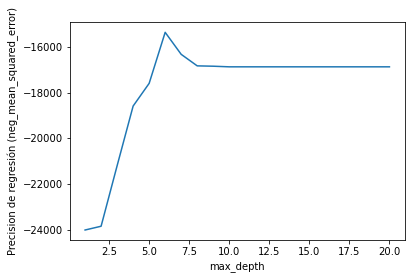

In [18]:

# Gráfica max_depth versus precisión de regresión
import matplotlib.pyplot as plt
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Precision de regresión (neg_mean_squared_error)')
plt.show()

In [19]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(-15374.840674066669, 6)

In [20]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeRegressor(max_depth=6, random_state=1)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=1)

A través de la librería sklearn, y con el uso de los predictores "Hour" y "Season" se procede a construir un árbol de regresión con el fin de crear un  modelo que prediga el total de bicicletas en alquiler según la hora del día y la estación del año.

Primero se hace un loop con el fin de evaluar el desempeño del modelo de acuerdo a su máxima profundidad entrenando un árbol por loop y evauluando el error de estos, al final de hacer el loop el modelo nos arroja la mejor profunidad para entrenar el árbol y se procede luego a través de la librería a hacer el entrenamiento, en este caso con una profundidad de 6 y un error de precisión de -15374.8.


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [24]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [28]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [29]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Este conjunto de datos resume un conjunto heterogéneo de características sobre artículos publicados por Mashable durante un período de dos años, con el objetivo de predecir el número de veces que se compartirán en redes sociales (popularidad). El conjunto de datos tiene 61 atributos, de los cuales algunos son números enteros y otros son valores reales. Hay un total de 39,797 instancias en este conjunto de datos. Los atributos están relacionados con características como el número de palabras, el título del artículo, el contenido multimedia, entre otros. 

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [30]:
# Celda 6
#arbol de decisión

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

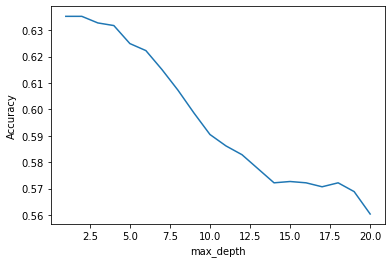

In [31]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [32]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6353333333333333, 2)

In [33]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [36]:
# Predicción y desempeño  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6448598130841121, 0.6453333333333333)

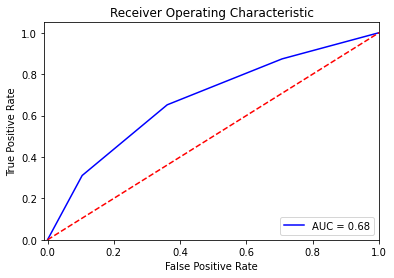

In [37]:
prediccionclf=clf.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionclf, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Se entrena un árbol de clasificación usando la librería sklearn para predecir si el artículo será popular o no a través de los diferentes predictores o características.

Primero se crea un loop para obtener el desempeño del modelo de acuerdo a la máxima profundidad, aquí obtenemos que una máxima profundidad de 2 sería lo más eficiente para el modelo, lo cuál le daría un accuracy de 0.63. Con esta profundidad se procede a entrenar el árbol de regresión y luego se pasa a predecir en la muestra de test con el fin de obtener diferentes métricas.

Obtenemos un F score de 0.64Un lo cual indica que el modelo tiene un rendimiento moderado en términos de su capacidad para predecir correctamente los valores del atributo objetivo. Además se obtiene un accuracy de 0.64 lo cuál nos indica que la precisión del modelo con respecto a los datos de test también es moderada.

Finalmente, se calcula una gráfica de la curva ROC y el AUC, siendo este último de 0.68 lo cuál va en línea con las anteriores métricas y nos arroja como conclusión que el rendimiento del modelo es moderado.


In [152]:
#Modelo de regresión logística

from sklearn.linear_model import LogisticRegression

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Se entrena el modelo
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)
#Se hacen las predicciones 
prediccionesRegLog=clfRegLog.predict(X_test)
prediccionesProbRegLog=clfRegLog.predict_proba(X_test)

y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


(0.6448598130841121, 0.6453333333333333)

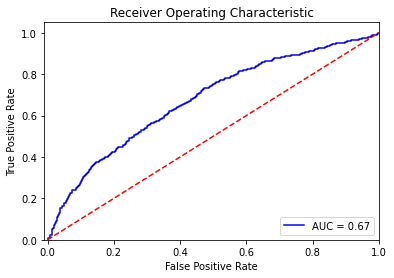

In [153]:
#se grafica la curva ROC y se calcula el AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionesProbRegLog[:,1], pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Se entrena una regresión logística usando la librería sklearn para predecir si el artículo será popular o no a través de los diferentes predictores o características.

Primero se entrena el modelo a través de la función LogisticRegression y se hacen las predicciones con el modelo creado sobre la muestra de test con el fin de obtener diferentes métricas.  

Obtenemos un F score de 0.64 lo cual indica que el modelo tiene un rendimiento moderado en términos de su capacidad para predecir correctamente los valores del atributo objetivo. Además, se obtiene un accuracy de 0.64 lo cuál nos indica que la precisión del modelo con respecto a los datos de test también es moderada.

Finalmente, se calcula una gráfica de la curva ROC y el AUC, siendo este último de 0.67 lo cuál va en línea con las anteriores métricas y nos arroja como conclusión que el rendimiento del modelo es moderado.


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [154]:
# Celda 7

# Creación de 100 muestras de bootstrap con un max depth de 7

n_estimators = 100
np.random.seed(123)
n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]


# Entrenamiento de 100 modelos con las 100 muestras boostrap

#from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees1 = {}
for i in range(n_estimators):
    trees1[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=7, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees1[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2520,1,1,1,1,1,0,1,1,1,0,...,1,1,0,0,1,0,1,1,1,1
3721,0,0,1,1,1,0,1,1,1,0,...,1,0,1,1,1,1,1,0,1,1
3727,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

1483    86
2185    83
2520    63
3721    83
3727    14
4524    73
234      4
4735    23
5839    42
2939    57
dtype: int64

In [156]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria

F1_71 = metrics.f1_score(y_pred, y_test)
print(F1_71)

0.6671061305207646


In [157]:
# Desempeño al hacer votación mayoritaria
A1_71 = metrics.accuracy_score(y_pred, y_test)
print(A1_71)

0.6633333333333333


In [158]:
# Creación de 100 muestras de bootstrap con un min_samples_leaf de 2

n_estimators = 100
np.random.seed(123)
n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]


# Entrenamiento de 100 modelos con las 100 muestras boostrap

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees2 = {}
for i in range(n_estimators):
    trees2[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i], min_samples_leaf=2)
    trees2[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees2[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,0,1,1,0,0,1,1,0,0,...,0,0,1,1,1,1,1,1,0,1
2185,1,0,0,0,1,0,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1
2520,0,0,0,0,0,1,1,1,0,1,...,0,0,1,1,1,1,0,1,1,1
3721,1,0,1,1,1,1,1,0,1,1,...,1,1,1,0,1,0,1,1,0,1
3727,0,0,0,0,0,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0


In [159]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

1483    57
2185    74
2520    49
3721    64
3727    25
4524    44
234      6
4735    37
5839    55
2939    43
dtype: int64

In [160]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
F1_72 = metrics.f1_score(y_pred, y_test)
print(F1_72)

0.6405693950177936


In [161]:
# Desempeño al hacer votación mayoritaria
A1_72 = metrics.accuracy_score(y_pred, y_test)
print(A1_72)

0.6633333333333333


In [168]:
#regresión logística 100 modelos


from sklearn.ensemble import BaggingClassifier
clf_rl = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=10000), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


# Predicción y desempeño al hacer votación mayoritaria
clf_rl.fit(X_train, y_train)
y_pred = clf_rl.predict(X_test)
F1_73 = metrics.f1_score(y_pred, y_test)
A1_72 = metrics.accuracy_score(y_pred, y_test)
print(F1_73)
print(A1_72)

0.6099585062240664
0.624


In [169]:
clf_rl

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000,
                                                    random_state=0),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [171]:
#evalue el ensamblaje de modelos
from sklearn.ensemble import VotingClassifier

# Crear una lista con los modelos a ensamblar
models = [('tree1_'+str(i), trees1[i]) for i in range(len(trees1))] + \
         [('tree2_'+str(i), trees2[i]) for i in range(len(trees2))] + \
         [('logistic_regression', clf_rl)]

# Crear el modelo de votación
ensemble = VotingClassifier(estimators=models, voting='hard')

# Entrenar el modelo de votación
ensemble.fit(X_train, y_train)

# Hacer predicciones con el modelo de votación
y_pred = ensemble.predict(X_test)

In [172]:
F1_en = metrics.f1_score(y_pred, y_test)
A1_en = metrics.accuracy_score(y_pred, y_test)
print(F1_en)
print(A1_en)

0.6562922868741542
0.6613333333333333


Se desarrolla a través de 3 diferentes fases, en la primera se crean 100 muestras de Bootstrap con una profundidad máxima de 7, se realiza un loop de 100 iteraciones para realizar 100 árboles mediante Bootstrap y luego se hace un ensamble de estos a través de votación mayoritaria, al hacer esto, obtenemos un F score de 0.66 lo cuál sigue indicando que el modelo tiene un rendimiento moderado, sin embargo, es mejor que los modelos individuales sin hacer el ensamblaje. Además del F score, también se calcula el accuracy del modelo obteniendo un valor de 0.66 lo cuál representa una precisión moderada del modelo, levemente superior que los modelos individuales sin realizar el ensamblaje.

en la segunda fase se crean 100 muestras de Bootstrap con mínimo de muestras por hoja de 2, se realiza un loop de 100 iteraciones para realizar 100 árboles mediante Bootstrap y luego se hace un ensamble de estos a través de votación mayoritaria, al hacer esto, obtenemos un F score de 0.66 lo cual sigue indicando que el modelo tiene un rendimiento moderado, sin embargo, es mejor que los modelos individuales sin hacer el ensamblaje. Además del F score, también se calcula el accuracy del modelo obteniendo un valor de 0.66 lo cual representa una precisión moderada del modelo, levemente superior que los modelos individuales sin realizar el ensamblaje.

en la tercera fase se crean 100 regresiones logísticas, se realiza un loop de 100 iteraciones para realizar 100 regresiones y luego se hace un ensamble de estos a través de votación mayoritaria, al hacer esto, obtenemos un F score de 0.60 lo cual sigue indicando que el modelo tiene un rendimiento moderado, sin embargo, en este caso mucho más bajo que con los árboles. Además del F score, también se calcula el accuracy del modelo obteniendo un valor de 0.62 lo cual representa una precisión moderada del modelo, levemente superior que los modelos individuales sin realizar el ensamblaje, pero inferior a los modelos con árboles.

Finalmente, se hace un ensamblaje de los 300 modelos, obteniendo uno nuevo con un F score de 0.65 y un accuracy de 0.66 siendo este un poco inferior a los modelos de bootstrap.


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [173]:
# Celda 8
    
# 300 muestras bagged con un max depth de 7 

clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf1.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1_81 = metrics.f1_score(y_pred, y_test)
A1_81 = metrics.accuracy_score(y_pred, y_test)
print(F1_81)
print(A1_81)

0.6448598130841121
0.6453333333333333


In [174]:
# 300 muestras bagged con un min_samples_leaf de 2

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=2), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf2.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1_82 = metrics.f1_score(y_pred, y_test)
A1_82 = metrics.accuracy_score(y_pred, y_test)
print(F1_82)
print(A1_82)

0.6448598130841121
0.6453333333333333


In [175]:
# 300 muestras bagged con una regresión logística

clf3 = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=10000), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf3.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1_83 = metrics.f1_score(y_pred, y_test)
A1_83 = metrics.accuracy_score(y_pred, y_test)
print(F1_83)
print(A1_83)

0.6448598130841121
0.6453333333333333


In [176]:
#evalue el ensamblaje de modelos
from sklearn.ensemble import VotingClassifier

# Crear una lista con los modelos a ensamblar
models = [('modelo1', clf1)] + \
         [('modelo2', clf2)] + \
         [('modelo3', clf3)]

# Crear el modelo de votación
ensemble = VotingClassifier(estimators=models, voting='hard')

# Entrenar el modelo de votación
ensemble.fit(X_train, y_train)

# Hacer predicciones con el modelo de votación
y_pred = ensemble.predict(X_test)

F2_en = metrics.f1_score(y_pred, y_test)
A2_en = metrics.accuracy_score(y_pred, y_test)
print(F1_en)
print(A1_en)

0.6562922868741542
0.6613333333333333


Se desarrolla a través de 3 diferentes fases, en la primera se crean 300 muestras de Bootstrap con una profundidad máxima de 7, se realiza un loop de 300 iteraciones para realizar 300 árboles mediante Bootstrap y luego se hace un ensamble de estos a través de votación ponderada, al hacer esto, obtenemos un F score de 0.65 lo cual nos dice que el modelo tiene un rendimiento moderado. Además del F score, también se calcula el accuracy del modelo obteniendo un valor de 0.65 lo cuál representa una precisión moderada del modelo, se observan puntajes inferiores a la votación mayoritaria.

en la segunda fase se crean 300 muestras de Bootstrap con mínimo de muestras por hoja de 2, se realiza un loop de 300 iteraciones para realizar 300 árboles mediante Bootstrap y luego se hace un ensamble de estos a través de votación ponderada, al hacer esto, obtenemos un F score de 0.65 lo cual nos dice que el modelo tiene un rendimiento moderado. Además del F score, también se calcula el accuracy del modelo obteniendo un valor de 0.65 lo cual representa una precisión moderada del modelo, se observan puntajes inferiores a la votación mayoritaria.

en la tercera fase se crean 300 regresiones logísticas, se realiza un loop de 300 iteraciones para realizar 300 regresiones y luego se hace un ensamble de estos a través de votación mayoritaria, al hacer esto, obtenemos un F score de 0.61 lo cual sigue indicando que el modelo tiene un rendimiento moderado, sin embargo, en este caso mucho más bajo que con los árboles. Además del F score, también se calcula el accuracy del modelo obteniendo un valor de 0.62 lo cual representa una precisión moderada del modelo, levemente superior que los modelos individuales sin realizar el ensamblaje, pero inferior a los modelos con árboles. También es de resaltar que se observa un mejor comportamiento de las regresiones con votación ponderada que con votación mayoritaria.


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

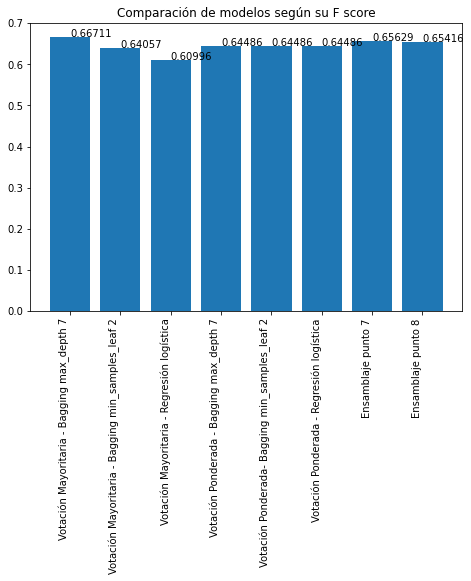

In [177]:
# Celda 9

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos según su F score")
ejeX = ['Votación Mayoritaria - Bagging max_depth 7','Votación Mayoritaria - Bagging min_samples_leaf 2' ,'Votación Mayoritaria - Regresión logística','Votación Ponderada - Bagging max_depth 7','Votación Ponderada- Bagging min_samples_leaf 2' ,'Votación Ponderada - Regresión logística', "Ensamblaje punto 7", 'Ensamblaje punto 8']
ejeY = [F1_71,F1_72 ,F1_73,F1_81,F1_82 ,F1_83, F1_en,F2_en]
ax.bar(ejeX,ejeY)
ax.set_xticklabels(ejeX)
fig.autofmt_xdate(rotation=90)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],5))
addlabels(ejeX,ejeY,plt)
plt.show()




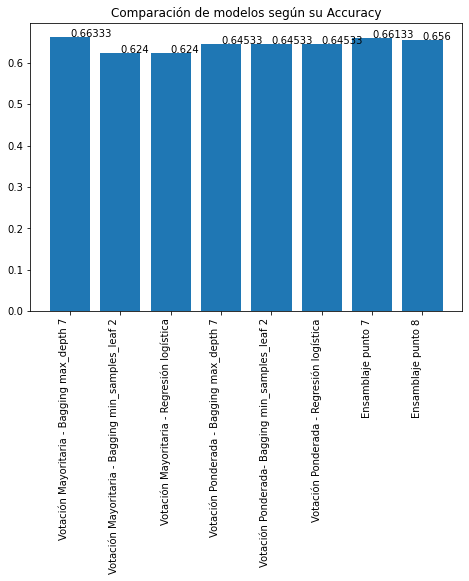

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos según su Accuracy")
ejeX = ['Votación Mayoritaria - Bagging max_depth 7','Votación Mayoritaria - Bagging min_samples_leaf 2' ,'Votación Mayoritaria - Regresión logística','Votación Ponderada - Bagging max_depth 7','Votación Ponderada- Bagging min_samples_leaf 2' ,'Votación Ponderada - Regresión logística', "Ensamblaje punto 7", "Ensamblaje punto 8"]
ejeY = [A1_71,A1_72,A1_72,A1_81,A1_82,A1_83,A1_en,A2_en]
ax.bar(ejeX,ejeY)
ax.set_xticklabels(ejeX)
fig.autofmt_xdate(rotation=90)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],5))
addlabels(ejeX,ejeY,plt)
plt.show()



Se evalúan las metodologías en los puntos 7 y 8 a través de dos gráficas. En la primera se comparan todos los modelos a través de su F score, a nivel general se puede observar que el comportamiento es muy similar entre todos los modelos y no se evidencian cambios muy significativos concluyendo esto en que el rendimiento en todos es moderado, sin embargo, se puede observar que los dos primeros modelos de bagging tienen el mejor score que los otros, por lo cual serían los modelos más significativos, siguiendo esta misma lógica, se concluye que la regresión logística sería el modelo menos significativo del grupo.

En la segunda gráfica comparan todos los modelos a través de su accuracy, a nivel general se puede observar que el comportamiento es muy similar entre todos los modelos y no se evidencian cambios muy significativos entre estos concluyendo esto en que la precisión en todos es moderada, sin embargo, se puede observar que la votación mayoritaria en bagging con una profundidad máxima de 7 es el modelo más preciso del grupo, siguiendo esta misma lógica, se concluye que la regresión logística y la votación mayoritaria con un mínimo de dos hojas sería el modelo menos significativo del grupo.
